In [1]:
s3_tests = []
for m in ["0", "21","42", "63", "84", "105", "126", "147"]:
    for i in ["00", "01", "02", "03", "04"]:        
        s3_tests.append(f"s3://aegovan-data/chemprot_adverserial/predictions_chemprot-affable-train-767-210-{m}-{i}-202212132155/202212161245/chemprot_abstract_test.json.json")

In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix, confidence=0.0):
    print(f"Downloading {s3_prefix}")
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
    total_predictions= len(df)
    df = df.query(f"confidence > {confidence} ")

    name = s3_prefix
    r = re.search(  "predictions_chemprot-affable-train-(\d+)-(\d+)-(\d+)", s3_prefix)
    name= s3_prefix
    train_size= int(r.group(1))
    train_pos_size= int(r.group(2))
    train_affable_pos= int(r.group(3))
    prediction_above_threshold = len(df)

    p,r,f,s = precision_recall_fscore_support(df["label"], 
                         df["prediction"], pos_label = 1, average="binary", zero_division=0)
        
    return { "Name": name, 
                    "Precision":p,
                    "Recall":r,
                    "F1":f,  
                  #  "Threshold": "HighConfidence", 
                    "Support": s, 
                        "TrainSize":train_size, "TrainSizePositive": train_pos_size,
                        "TrainAffablePositive" : train_affable_pos,
                        "TrainAffablePositiveRate" : round(train_affable_pos/train_pos_size,1),
                        "PredictionsSize": total_predictions, 
                   "PredictionsAboveThresholdSize": prediction_above_threshold,
                    "PredictionsAboveThresholdRatio" :prediction_above_threshold/total_predictions
           
           }
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s, confidence=0.0) for s in s3_prefixes]
    df =  pd.DataFrame(result)
    return df


In [5]:
%%time

df_stats = create_dfs_from_prefixes(s3_tests)


In [6]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAffablePositive,TrainAffablePositiveRate,PredictionsSize,PredictionsAboveThresholdSize,PredictionsAboveThresholdRatio
0,s3://aegovan-data/chemprot_adverserial/predict...,0.275458,0.563718,0.370079,None,767,210,0,0.0,5744,5744,1.0
1,s3://aegovan-data/chemprot_adverserial/predict...,0.269072,0.682159,0.385920,None,767,210,0,0.0,5744,5744,1.0
2,s3://aegovan-data/chemprot_adverserial/predict...,0.289655,0.692654,0.408488,None,767,210,0,0.0,5744,5744,1.0
3,s3://aegovan-data/chemprot_adverserial/predict...,0.252577,0.587706,0.353312,None,767,210,0,0.0,5744,5744,1.0
4,s3://aegovan-data/chemprot_adverserial/predict...,0.222030,0.770615,0.344735,None,767,210,0,0.0,5744,5744,1.0
5,s3://aegovan-data/chemprot_adverserial/predict...,0.207502,0.514243,0.295690,None,767,210,21,0.1,5744,5744,1.0
6,s3://aegovan-data/chemprot_adverserial/predict...,0.319712,0.398801,0.354903,None,767,210,21,0.1,5744,5744,1.0
7,s3://aegovan-data/chemprot_adverserial/predict...,0.227124,0.625187,0.333200,None,767,210,21,0.1,5744,5744,1.0
8,s3://aegovan-data/chemprot_adverserial/predict...,0.217030,0.626687,0.322406,None,767,210,21,0.1,5744,5744,1.0
9,s3://aegovan-data/chemprot_adverserial/predict...,0.228296,0.532234,0.319532,None,767,210,21,0.1,5744,5744,1.0


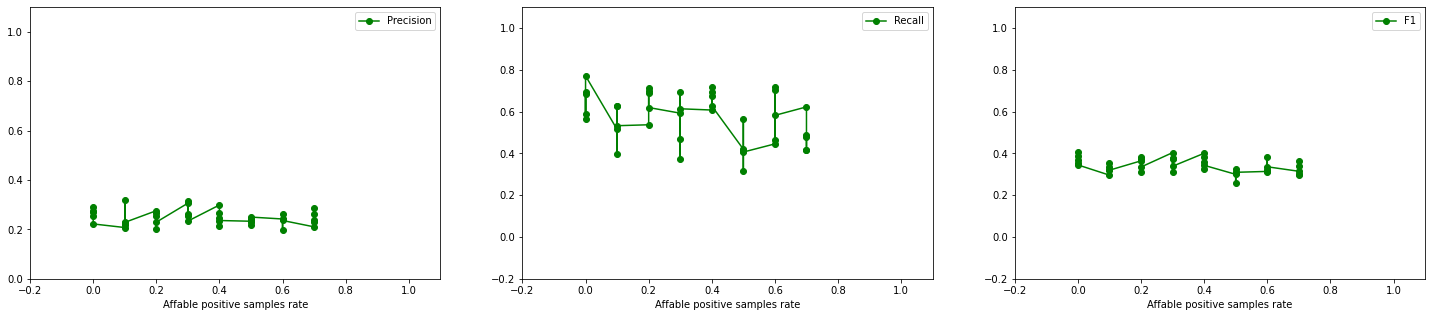

In [7]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAffablePositiveRate" : "Affable positive samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }

        df[["Precision", "TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable positive samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(-0.2, 1.1), ax=ax[0], color=(my_colors))

        df[["Recall","TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable positive samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[1], color=(my_colors))

        df[["F1","TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable positive samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[2], color=(my_colors))

       
        plt.legend()

plot_comparison(df_stats)   

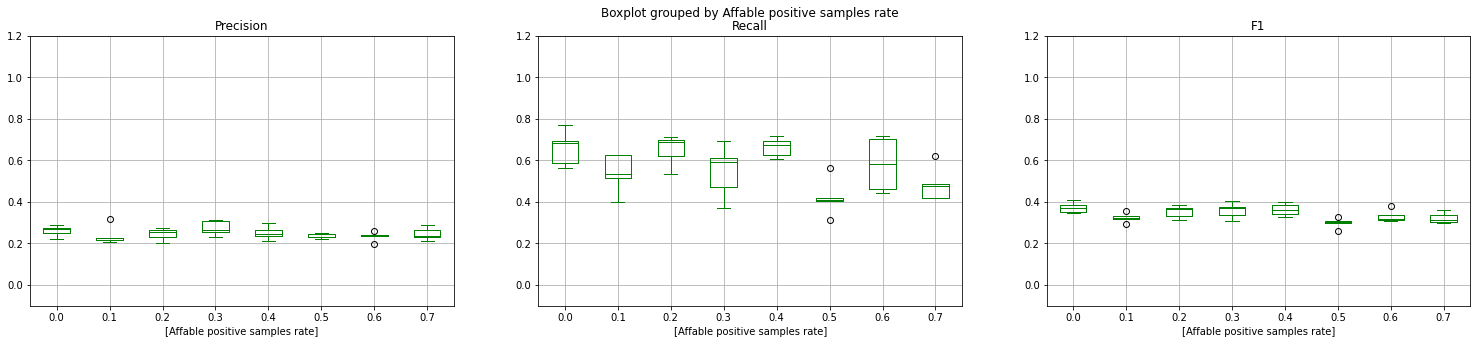

In [8]:
def plot_comparison_box(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAffablePositiveRate" : "Affable positive samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }
        ax[0].set_ylim(-0.1,1.2)
        df[["Precision", "TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable positive samples rate",  ax=ax[0], color="green")

        ax[1].set_ylim(-0.1,1.2)
        df[["Recall","TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable positive samples rate",  ax=ax[1], color="green")

        ax[2].set_ylim(-0.1,1.2)
        df[["F1","TrainAffablePositiveRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable positive samples rate",  ax=ax[2], color="green")

       
        #plt.legend()

plot_comparison_box(df_stats)

In [10]:
df_stats.groupby("TrainAffablePositiveRate")[["Precision", "Recall", "F1", "PredictionsAboveThresholdSize"]].describe().T

TrainAffablePositiveRate                     0.0          0.1          0.2  \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.261758     0.239933     0.245356   
                              std       0.025894     0.045388     0.030659   
                              min       0.222030     0.207502     0.200000   
                              25%       0.252577     0.217030     0.229317   
                              50%       0.269072     0.227124     0.256152   
                              75%       0.275458     0.228296     0.265714   
                              max       0.289655     0.319712     0.275597   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.659370     0.539430     0.650375   
                              std       0.084094     0.094115     0.072813   
                              min       0.563718     0.398801     0.536732   
                              25%       0.587706     0.514243     0.619190   
                              50%       0.682159     0.532234     0.686657   
                              75%       0.692654     0.625187     0.697151   
                              max       0.770615     0.626687     0.712144   
F1                            count     5.000000     5.000000     5.000000   
                              mean      0.372507     0.325146     0.353812   
                              std       0.025594     0.021547     0.029701   
                              min       0.344735     0.295690     0.312295   
                              25%       0.353312     0.319532     0.334684   
                              50%       0.370079     0.322406     0.364191   
                              75%       0.385920     0.333200     0.373116   
                              max       0.408488     0.354903     0.384775   
PredictionsAboveThresholdSize count     5.000000     5.000000     5.000000   
                              mean   5744.000000  5744.000000  5744.000000   
                              std       0.000000     0.000000     0.000000   
                              min    5744.000000  5744.000000  5744.000000   
                              25%    5744.000000  5744.000000  5744.000000   
                              50%    5744.000000  5744.000000  5744.000000   
                              75%    5744.000000  5744.000000  5744.000000   
                              max    5744.000000  5744.000000  5744.000000   

TrainAffablePositiveRate                     0.3          0.4          0.5  \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.274711     0.251456     0.235125   
                              std       0.034604     0.032781     0.011869   
                              min       0.233581     0.211786     0.219436   
                              25%       0.254956     0.235892     0.229920   
                              50%       0.264111     0.244954     0.232945   
                              75%       0.305964     0.265976     0.243556   
                              max       0.314945     0.298673     0.249770   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.548426     0.663268     0.422789   
                              std       0.127054     0.045531     0.088767   
                              min       0.371814     0.607196     0.314843   
                              25%       0.470765     0.626687     0.406297   
                              50%       0.592204     0.673163     0.410795   
                              75%       0.613193     0.692654     0.419790   
                              max       0.694153     0.716642     0.562219   
F1                            count     5.000000     5.000000     5.000000   
                     

In [14]:
from scipy import stats


 
    
stats.ttest_ind(df_stats.query("TrainAffablePositiveRate == 0.0")["Precision"], 
                df_stats.query("TrainAffablePositiveRate == 0.7")["Precision"])

Ttest_indResult(statistic=0.9061871154642434, pvalue=0.39131271462625605)

In [15]:
    
stats.ttest_ind(df_stats.query("TrainAffablePositiveRate == 0")["F1"], 
                df_stats.query("TrainAffablePositiveRate == 0.7")["F1"])

Ttest_indResult(statistic=2.9441871097371797, pvalue=0.01859019941839392)

In [16]:
stats.ttest_ind(df_stats.query("TrainAffablePositiveRate == 0")["Recall"], 
                df_stats.query("TrainAffablePositiveRate == 0.7")["Recall"])

Ttest_indResult(statistic=3.290052697513629, pvalue=0.011021171074183041)